In [1]:
import urllib.request, json 
import pandas as pd    
import matplotlib.pyplot as plt

data = ''
with urllib.request.urlopen("https://services.swpc.noaa.gov/json/goes/primary/differential-protons-1-day.json") as url:
    data = json.loads(url.read().decode())
    #print(data)
df = pd.json_normalize(data)
df.info()
p1_data = df[df['channel'] == 'P1']
p1_flux_20min = p1_data['flux'].rolling(5).mean()
p1_data['20_min'] = p1_flux_20min
print(p1_data.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3731 entries, 0 to 3730
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time_tag   3731 non-null   object 
 1   satellite  3731 non-null   int64  
 2   flux       3731 non-null   float64
 3   energy     3731 non-null   object 
 4   yaw_flip   3731 non-null   int64  
 5   channel    3731 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 175.0+ KB
                 time_tag  satellite      flux         energy  yaw_flip  \
0    2021-08-01T06:00:00Z         16  0.000145  1020-1860 keV         0   
13   2021-08-01T06:05:00Z         16  0.000073  1020-1860 keV         0   
26   2021-08-01T06:10:00Z         16  0.000145  1020-1860 keV         0   
39   2021-08-01T06:15:00Z         16  0.000109  1020-1860 keV         0   
52   2021-08-01T06:20:00Z         16  0.000073  1020-1860 keV         0   
65   2021-08-01T06:25:00Z         16  0.000036  1020-1860 ke

<ipython-input-1-76b1e07a1c00>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_data['20_min'] = p1_flux_20min


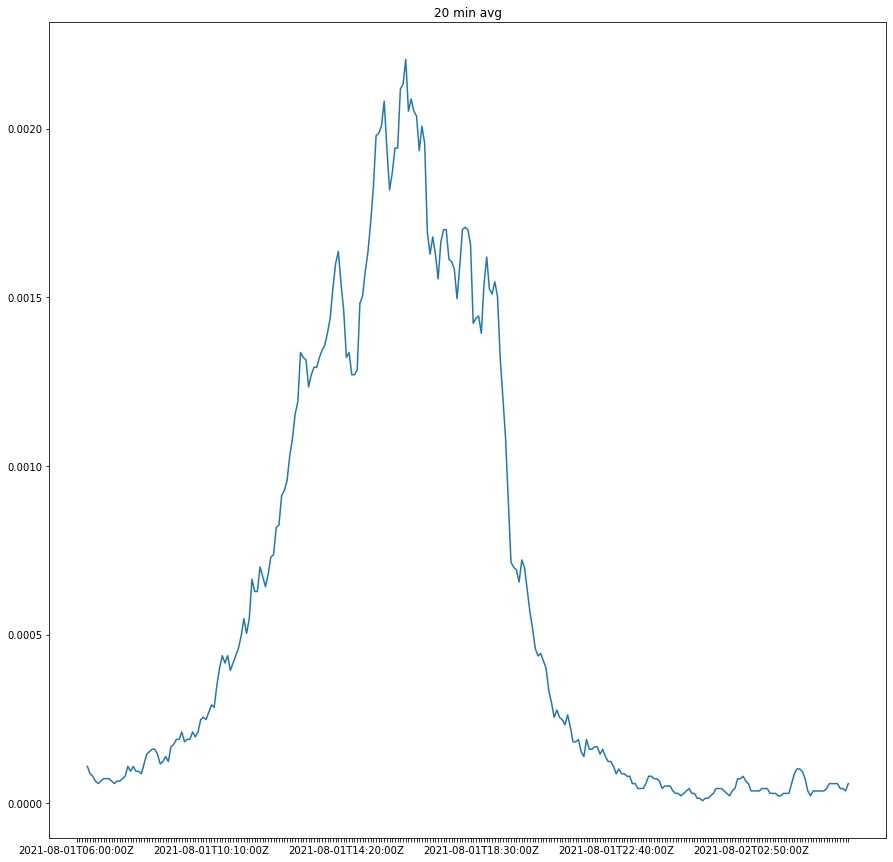

In [18]:
fig,axes=plt.subplots(1, 1, figsize=(15,15))
axes.set_title('20 min avg')
axes.plot(p1_data["time_tag"],p1_data['20_min'])
for i, tick in enumerate(axes.xaxis.get_ticklabels()):
    tick.set_visible(False)
    if i % 50 == 0:
        tick.set_visible(True)        
plt.show()